In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from PIL import ImageFile
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Data Exploration**

In [8]:
#cek folder
main_directory = "/content/drive/MyDrive/Faceshape-Preprocess/dataset"
os.listdir(main_directory)

['test', 'train', 'val']

In [9]:
class_ = os.listdir(os.path.join(main_directory, "test"))

In [10]:
os.listdir(os.path.join(main_directory, "test"))

['Heart', 'Oval', 'Round', 'Square']

In [11]:
print("Test files")
files_num_test = []
files_num_val = []
files_num_train = []

for i in range (len(class_)):
    files_num_test.append(len(os.listdir(os.path.join(main_directory,"test/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_test[i]}")

print("\nVal files")
for i in range (len(class_)):
    files_num_val.append(len(os.listdir(os.path.join(main_directory,"val/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_val[i]}")

print("\nTrain files")
for i in range (len(class_)):
    files_num_train.append(len(os.listdir(os.path.join(main_directory,"train/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_train[i]}")

Test files
Number of files from class Heart is 100
Number of files from class Oval is 99
Number of files from class Round is 99
Number of files from class Square is 100

Val files
Number of files from class Heart is 200
Number of files from class Oval is 200
Number of files from class Round is 200
Number of files from class Square is 200

Train files
Number of files from class Heart is 698
Number of files from class Oval is 697
Number of files from class Round is 689
Number of files from class Square is 699


<function matplotlib.pyplot.show(close=None, block=None)>

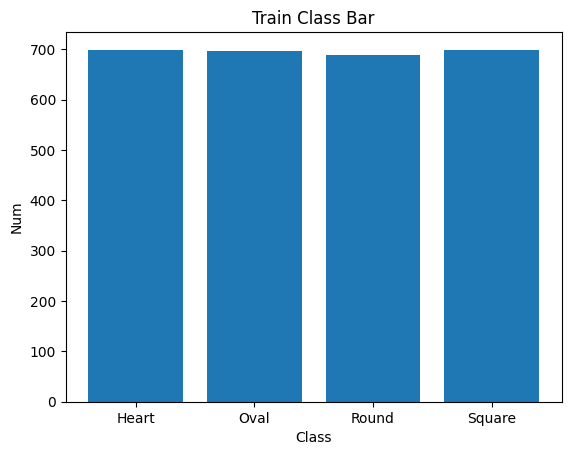

In [12]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_train)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Train Class Bar')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

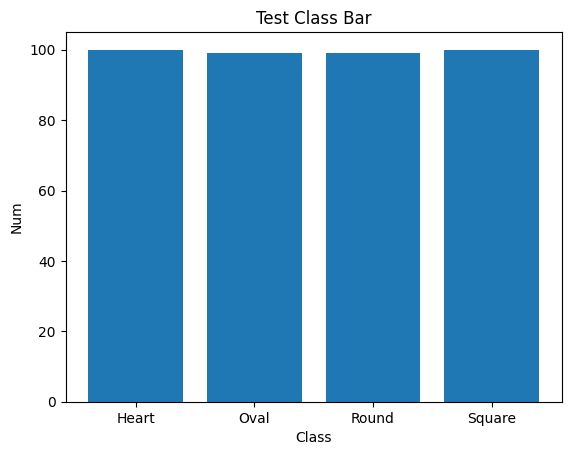

In [13]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_test)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Test Class Bar')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

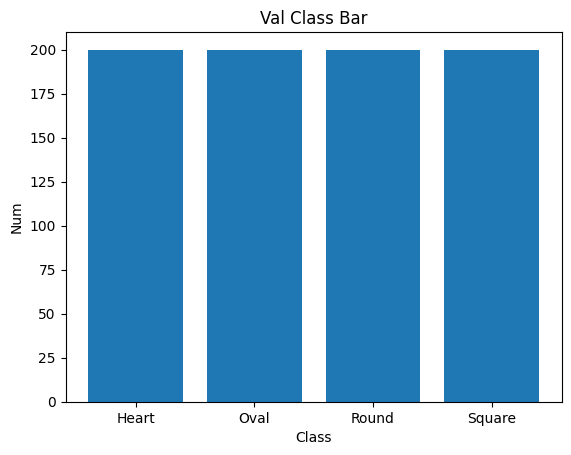

In [14]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_val)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Val Class Bar')

plt.show

In [16]:
train_data = "/content/drive/MyDrive/Faceshape-Preprocess/dataset/train"
val_data = "/content/drive/MyDrive/Faceshape-Preprocess/dataset/val"
test_data = "/content/drive/MyDrive/Faceshape-Preprocess/dataset/test"

<ipython-input-17-778e6157d1f0>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


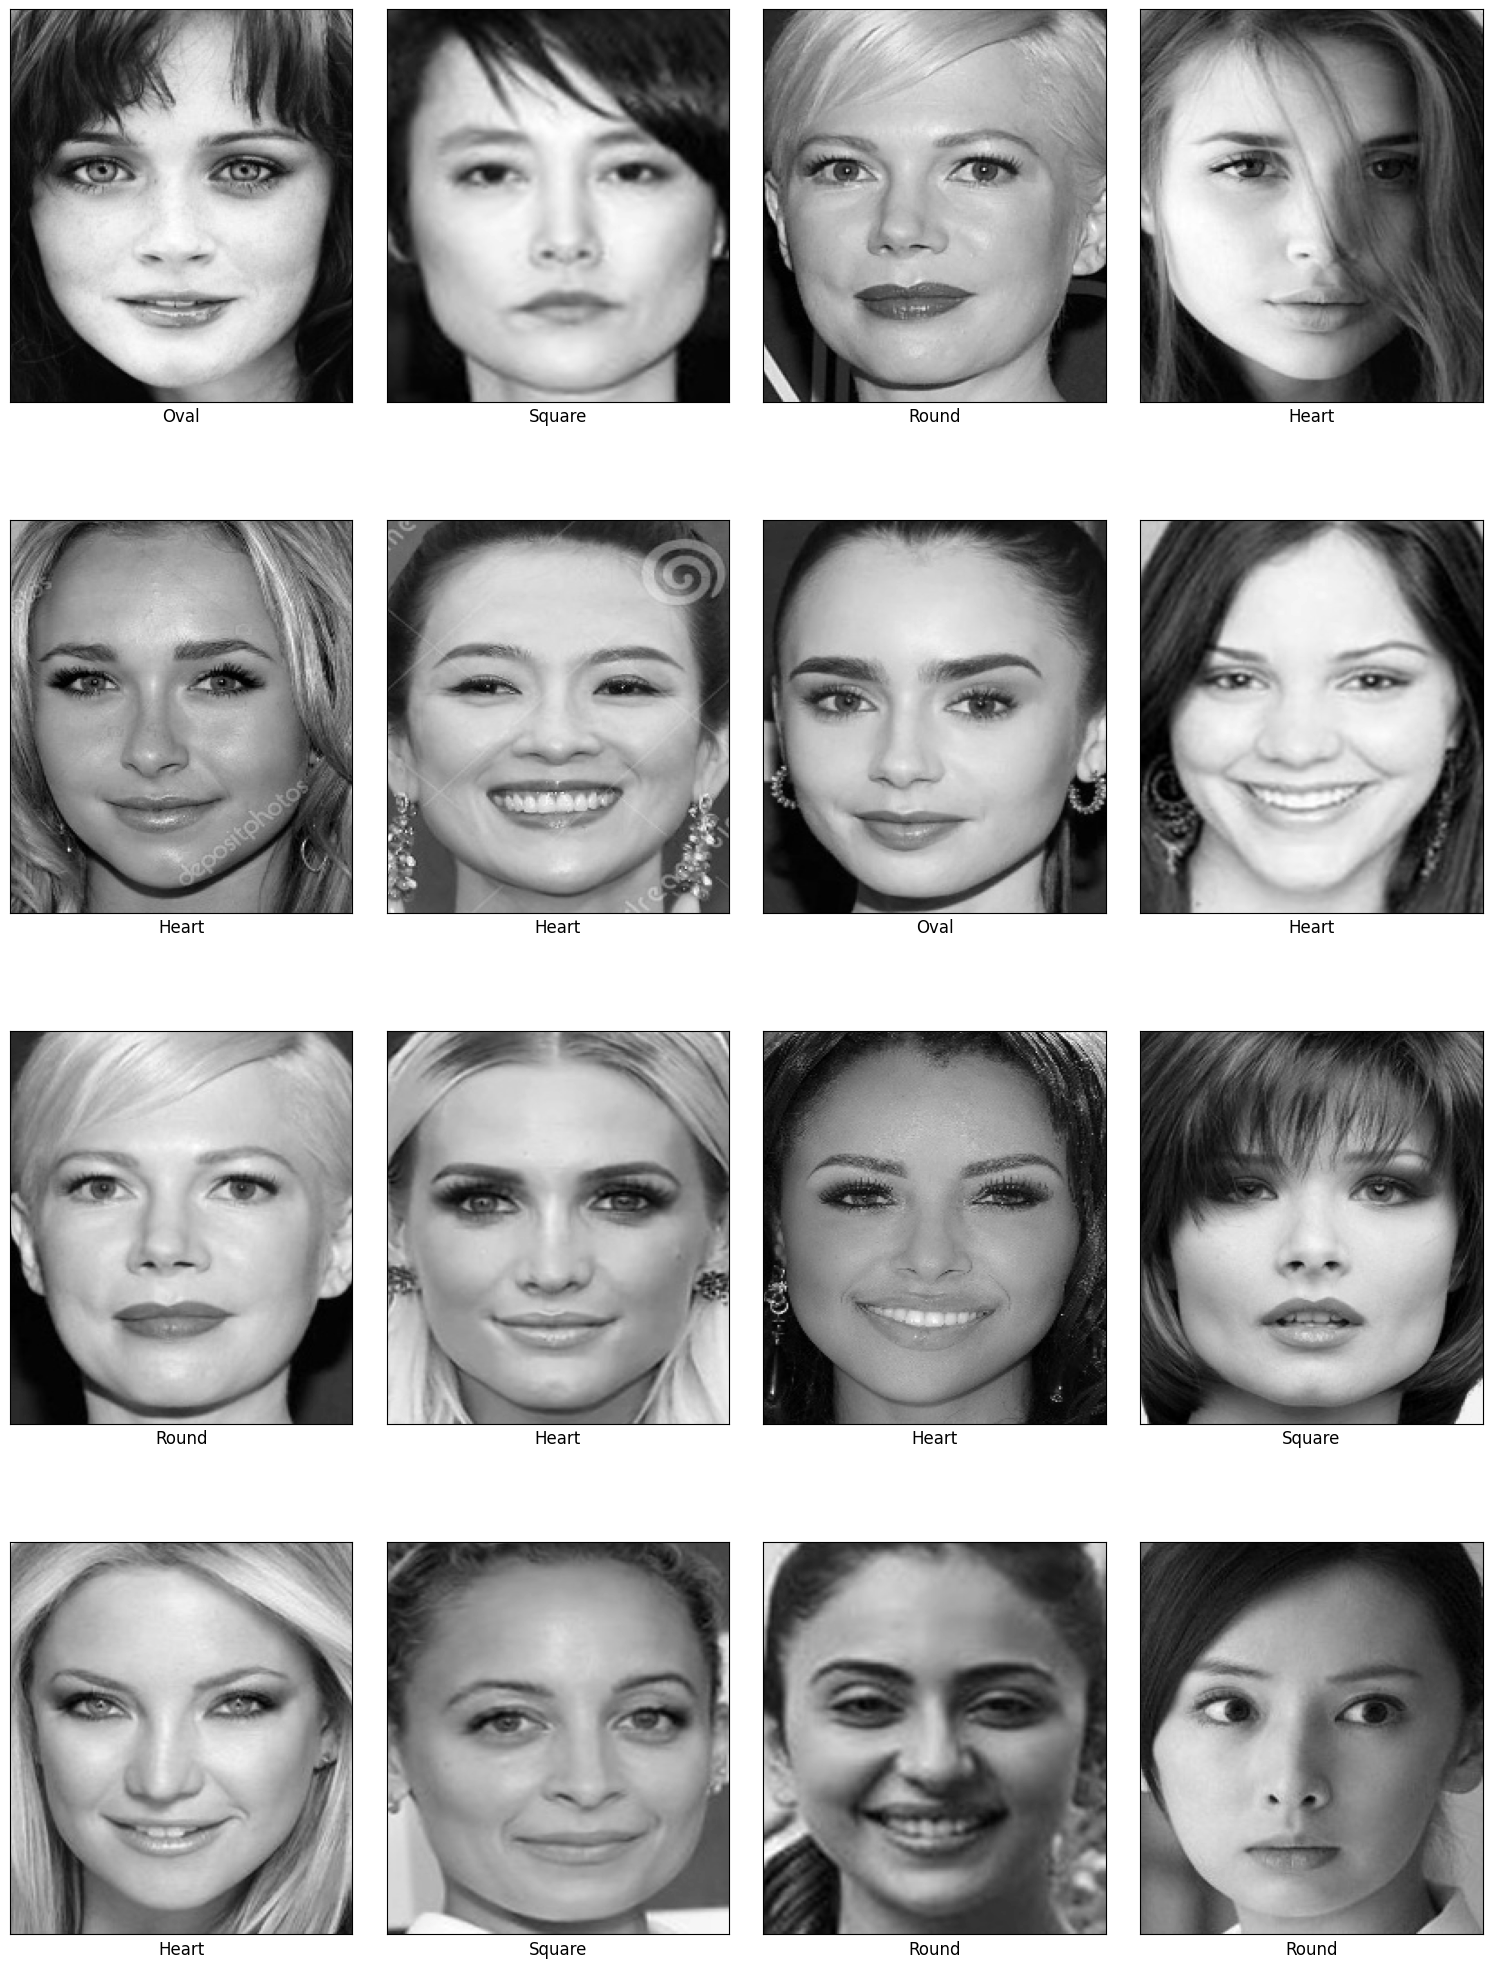

In [17]:
import random
import matplotlib.image as mpimg
from matplotlib import gridspec

# Set up the grid for images
num_rows = 4
num_cols = 4
fig = plt.figure(figsize=(19, 25))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.1, hspace=0.3)

for i in range(num_rows):
    for j in range(num_cols):
        # Randomly select a class
        random_class = random.choice(class_)

        # Path to the randomly selected class folder
        random_class_folder = os.path.join(train_data, random_class)

        # Get the list of images in the randomly selected class folder
        images = os.listdir(random_class_folder)

        # Randomly select an image from the class
        random_image = random.choice(images)

        # Path to the randomly selected image
        random_image_path = os.path.join(random_class_folder, random_image)

        # Load the randomly selected grayscale image
        img = mpimg.imread(random_image_path)

        # Display the image in the grid
        ax = plt.subplot(gs[i, j])
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')

        # Display the class label below the image
        ax.set_xlabel(random_class, fontsize=12)

plt.tight_layout()
plt.show()

**Preprocessing**

In [18]:
train_datagen = ImageDataGenerator(
                                    rescale = 1./255,
                                    horizontal_flip = True,
                                    brightness_range=(0.8, 1.2),

                                    )
val_datagen = ImageDataGenerator(
                                    rescale = 1./255,
                                    horizontal_flip = True,
                                    brightness_range=(0.8, 1.2),

                                    )

test_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                horizontal_flip = True,
                                brightness_range = (0.8,1.2),

                                )

In [19]:
train_set = train_datagen.flow_from_directory ( train_data,
                                               target_size = (250,190),
                                               batch_size = 16,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )

val_set = train_datagen.flow_from_directory ( val_data,
                                               target_size = (250,190),
                                               batch_size = 16,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )

test_set = train_datagen.flow_from_directory ( os.path.join(main_directory,"test"),
                                               target_size = (250,190),
                                               batch_size = 16,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )

Found 2783 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 398 images belonging to 4 classes.


In [20]:
# train_set = tf.cast(train_set, 'float64')

In [21]:
# val_set = tf.cast(val_set, 'float64')

In [22]:
# test_set = tf.cast(test_set, 'float64')

In [23]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, MobileNet, Xception, DenseNet201, EfficientNetB0
def get_pretrained_model(model_name, input_shape, num_classes):
    if model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(250,190,3))
    elif model_name == 'VGG19':
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionResNetV2':
        base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNet':
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'Xception':
        base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet201':
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Invalid model name. Supported models: VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, MobileNet, Xception, DenseNet201, EfficientNetB0')

    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model


model = get_pretrained_model('MobileNet', (250, 190, 3), num_classes=4)
model.summary()

<ipython-input-23-ecf838e72e77>:14: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 5, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [24]:
from tensorflow.keras import layers, optimizers
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(
      train_set,
      epochs=50,
      validation_data=val_set,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 1158s 6s/step - accuracy: 0.3477 - loss: 1.8193 - val_accuracy: 0.4512 - val_loss: 1.2564
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.6380 - loss: 0.9347 - val_accuracy: 0.5400 - val_loss: 1.2133
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.7758 - loss: 0.5849 - val_accuracy: 0.7250 - val_loss: 0.7298
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.8416 - loss: 0.4033 - val_accuracy: 0.7625 - val_loss: 0.6772
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 30s 171ms/step - accuracy: 0.8835 - loss: 0.2968 - val_accuracy: 0.7713 - val_loss: 0.6906
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.9167 - loss: 0.2162 - val_accuracy: 0.8325 - val_loss: 0.5085
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.9394 - loss: 0.1667 - val_accuracy: 0.7688 - val_loss: 0.7498
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.9466 - loss: 0.1418 - val_

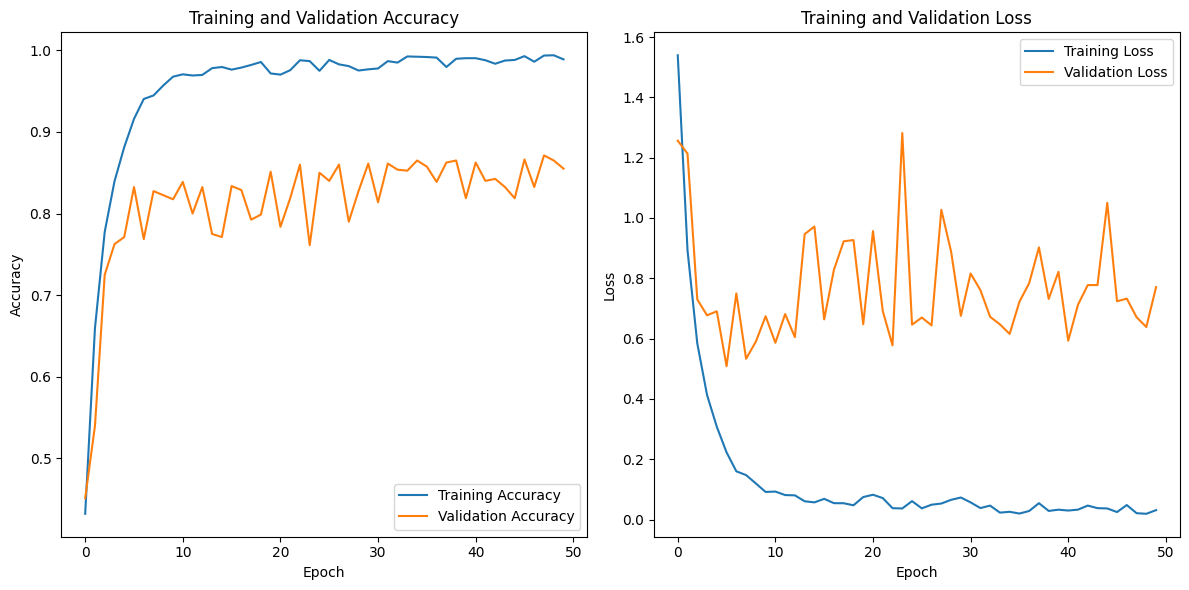

In [27]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [28]:
model.save('/content/drive/MyDrive/Faceshape-Preprocess/model/MobileNet.h5')
model.save('/content/drive/MyDrive/Faceshape-Preprocess/model/MobileNet.keras')

In [29]:
yhat = model.predict(test_set)
#print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}'

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 168s 7s/step


In [30]:
# Dapetin index nilai tertinggi di setiap baris
import numpy as np

predicted_labels = np.argmax(yhat, axis=1)
class_names = ['Heart', 'Oval', 'Round', 'Square']

predicted_class_names = [class_names[i] for i in predicted_labels]

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step
Accuracy: 86.43%


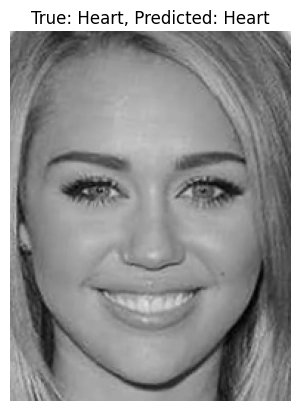

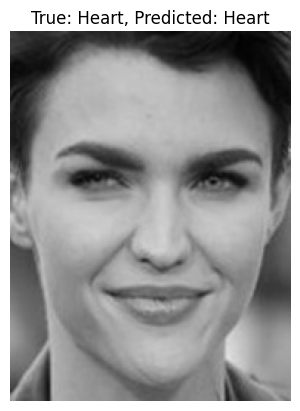

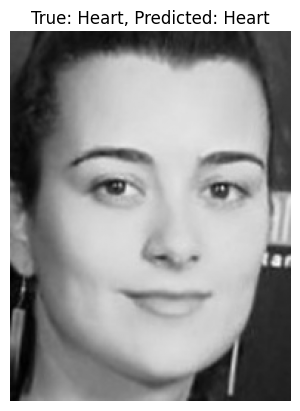

In [31]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
#model = load_model('path_to_your_trained_model.h5')

# Path to test dataset directory
test_dir = '/content/drive/MyDrive/Faceshape-Preprocess/dataset/test'

# Get class names from folder names
class_names = sorted(os.listdir(test_dir))

# Load test images and labels
test_images = []
true_labels = []

for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        #image = cv2.resize(image, (224, 224))  # Resize if needed
        test_images.append(image)
        true_labels.append(i)  # Assign label index

# Convert to numpy arrays
test_images = np.array(test_images)
true_labels = np.array(true_labels)

# Normalize images
test_images = test_images / 255.0

# Predict classes for test images
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display some test images with true and predicted labels
import matplotlib.pyplot as plt

num_images_to_display = 3
for i in range(num_images_to_display):
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[true_labels[i]]}, Predicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()

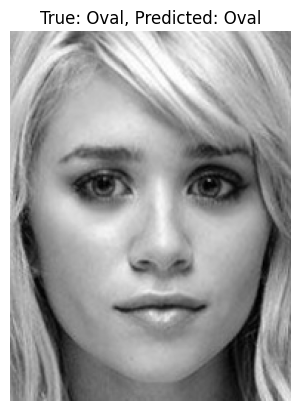

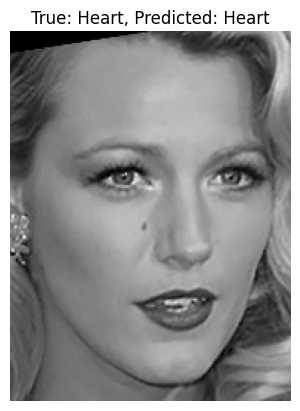

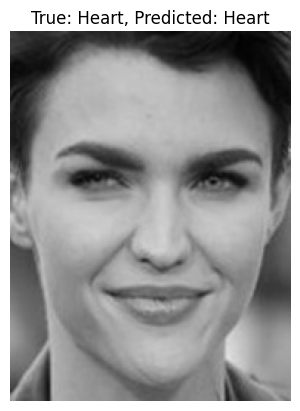

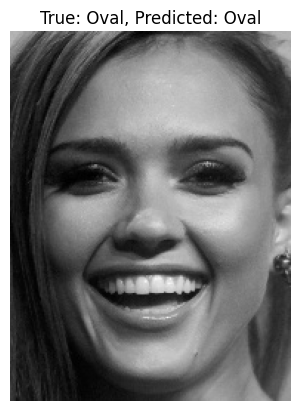

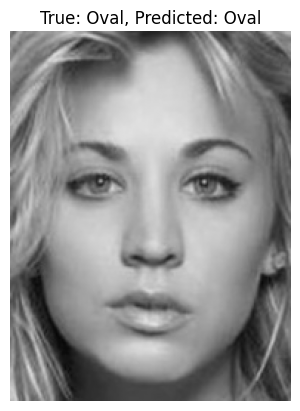

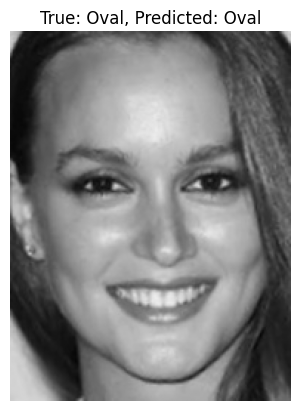

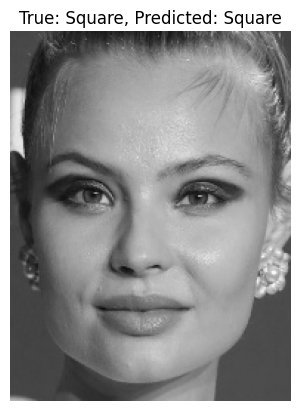

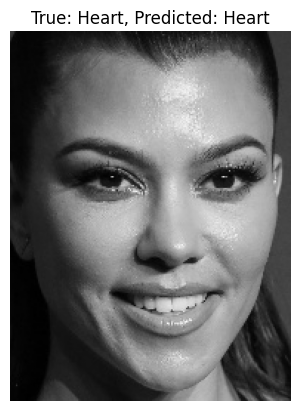

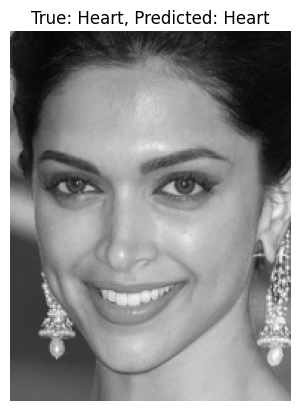

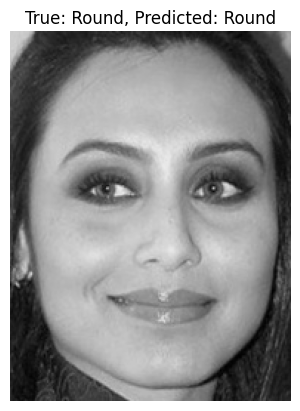

In [36]:
# Shuffle test images and labels
indices = np.arange(len(test_images))
np.random.shuffle(indices)

shuffled_test_images = test_images[indices]
shuffled_true_labels = true_labels[indices]

# Display some shuffled test images with true and predicted labels
num_images_to_display = 10

for i in range(num_images_to_display):
    plt.imshow(shuffled_test_images[i])
    plt.title(f"True: {class_names[shuffled_true_labels[i]]}, Predicted: {class_names[predicted_labels[indices[i]]]}")
    plt.axis('off')
    plt.show()